# Chapter 6: Breadth-first search

- You learn how to model a network using a new, abstract data structure: graphs.
- You learn breadth-first search, an algorithm you can run on graphs to answer questions like, “What’s the shortest path to go to X?”
- You learn about directed versus undirected graphs.
- You learn topological sort, a different kind of sorting algorithm that exposes dependencies between nodes.

## Introduction to graphs

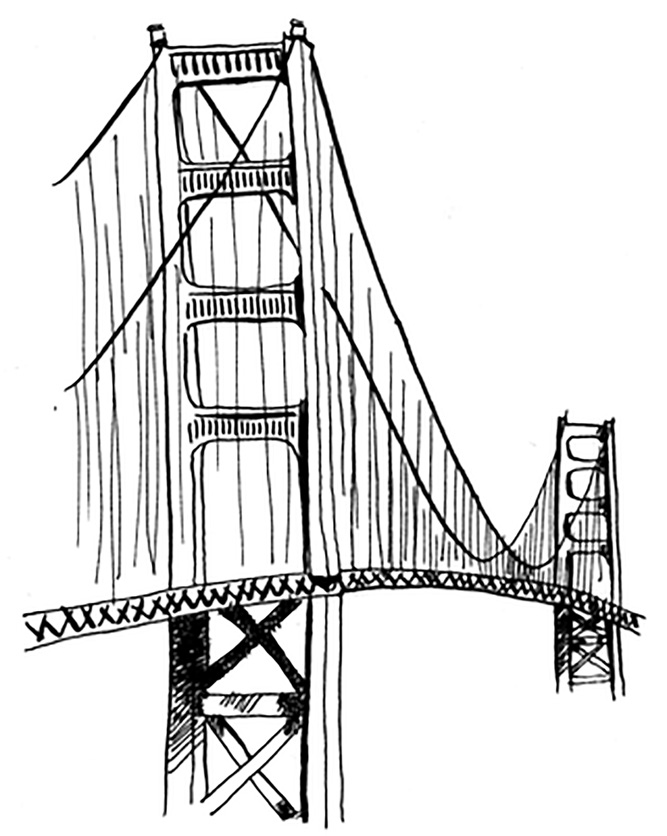

Suppose you’re in San Francisco, and you want to go from Twin Peaks to the Golden Gate Bridge. You want to get there by bus, with the minimum number of transfers. Here are your options.

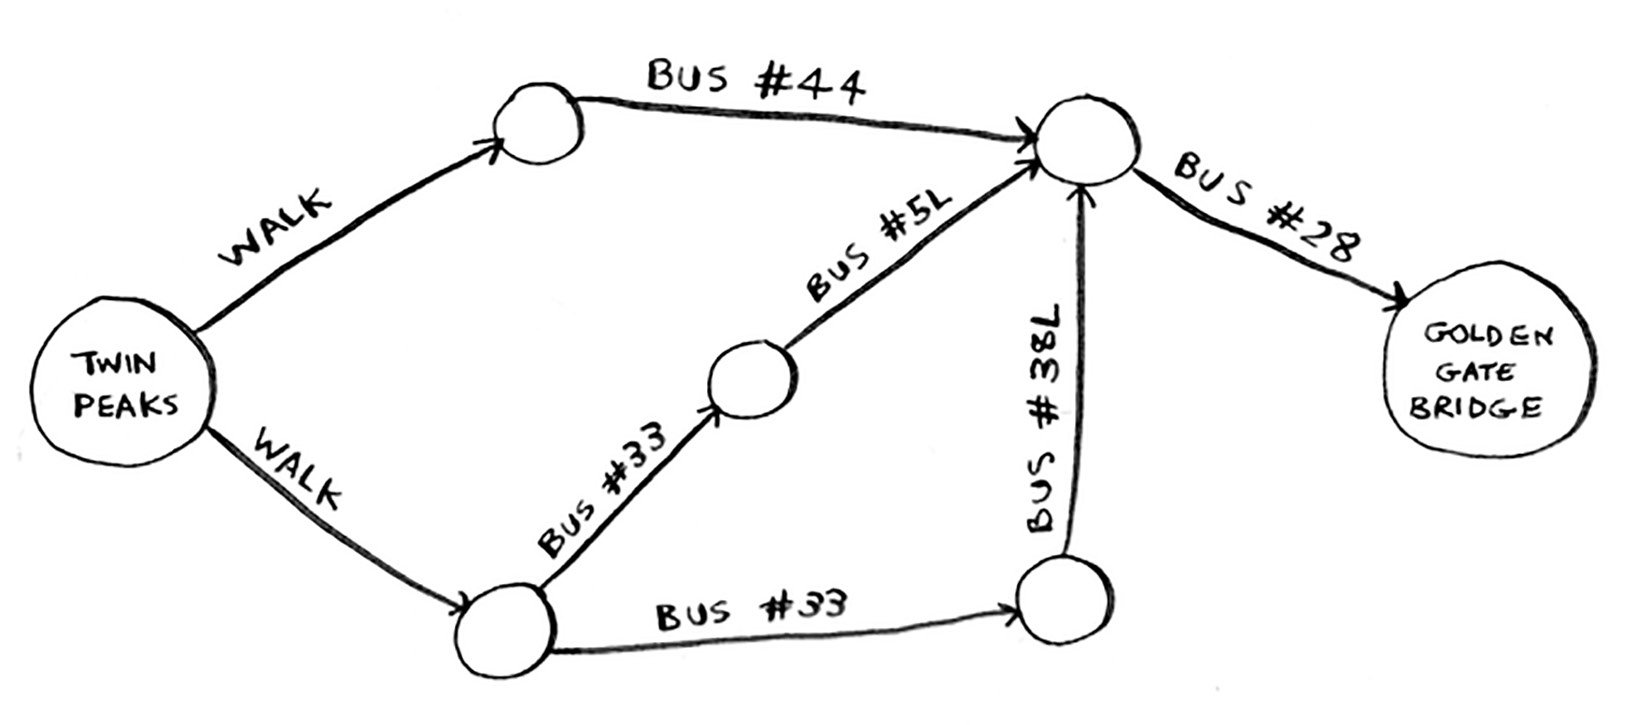

What’s your algorithm to find the path with the fewest steps? 
Well, can you get there in one step? Here are all the places you can get to in one step.

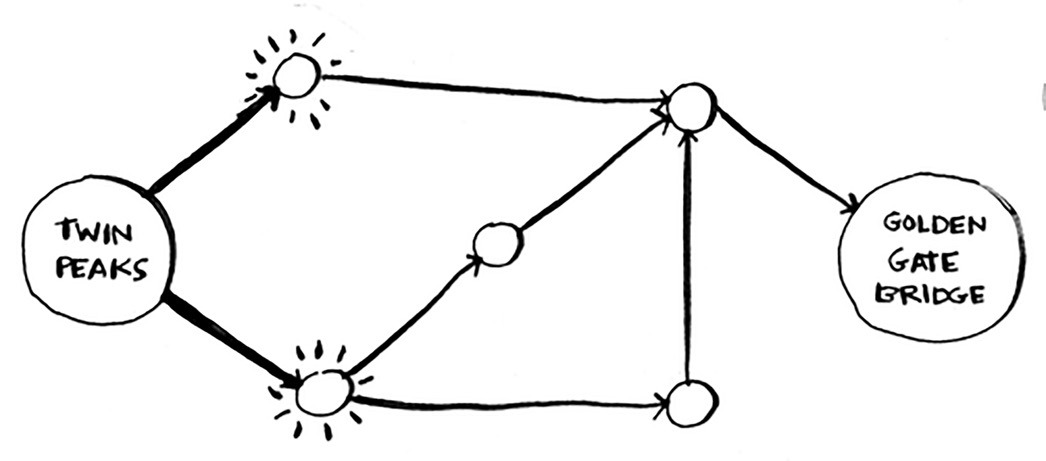

The bridge isn’t highlighted; you can’t get there in one step. Can you getthere in two steps?

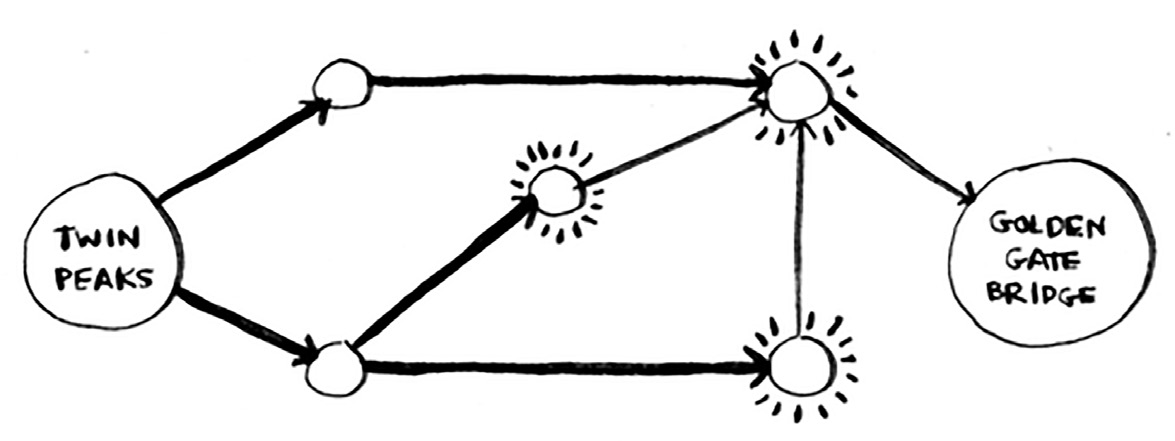

Again, the bridge isn’t there, so you can’t get to the bridge in two steps. What about three steps?

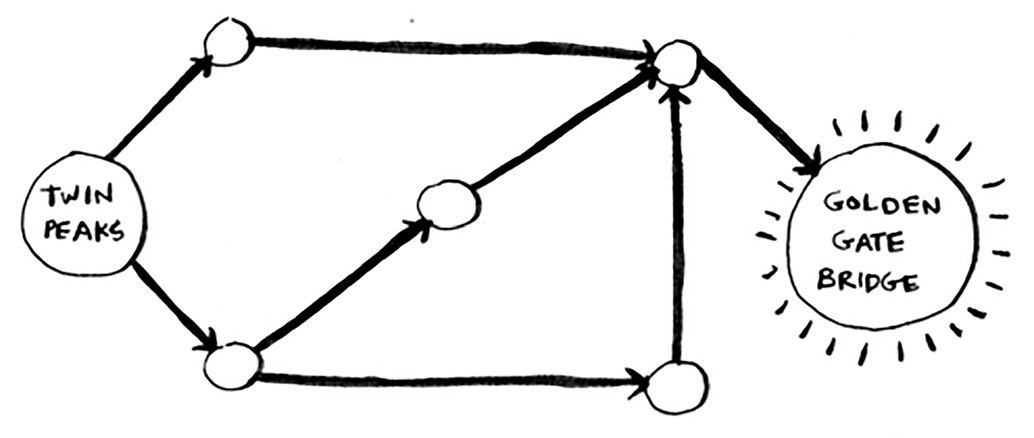

Aha! Now the Golden Gate Bridge shows up. So it takes three steps to get from Twin Peaks to the bridge using this route.

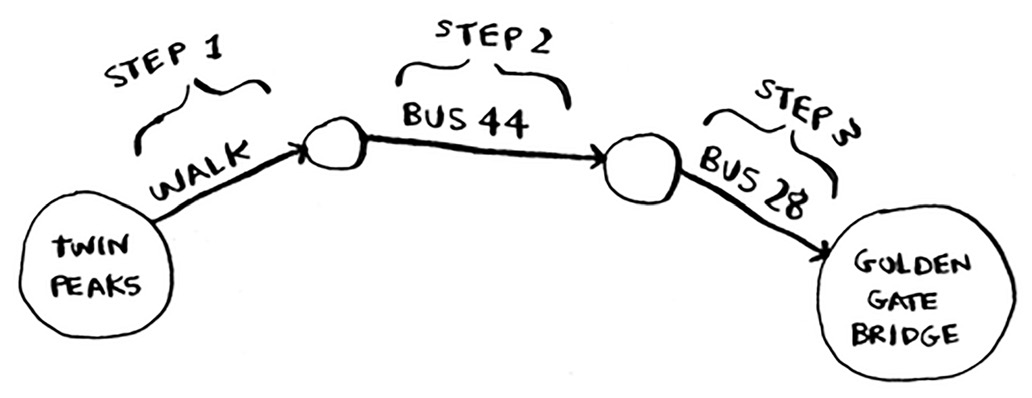

There are other routes that will get you to the bridge too, but they’re longer (four steps). The algorithm found that the shortest route to the bridge is three steps long. This type of problem is called a shortest-path problem. You’re always trying to find the shortest something. It could be the shortest route to your friend’s house. It could be the smallest number of moves to checkmate in a game of chess. The algorithm to solve a shortest-path problem is called breadth-first search.

To figure out how to get from Twin Peaks to the Golden Gate Bridge, there are two steps:
1. Model the problem as a graph.
2. Solve the problem using breadth-first search.

Each graph is made up of nodes and edges.

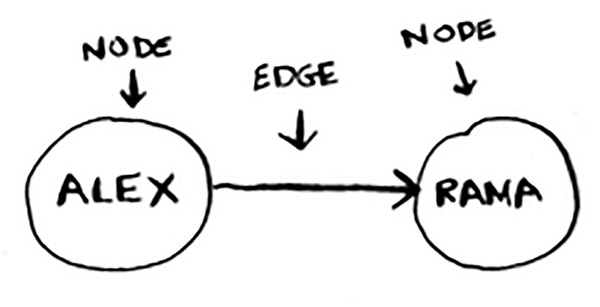

That’s all there is to it! Graphs are made up of nodes and edges. A node can be directly connected to many other nodes. Those nodes are called its neighbors. Graphs are a way to model how different things are connected to one another.

## Breadth-first search

We looked at a search algorithm in chapter 1: binary search. Breadthfirst search is a different kind of search algorithm: one that runs on graphs. It can help answer two types of questions:
- Question type 1: Is there a path from node A to node B?
- Question type 2: What is the shortest path from node A to node B?

### Example

Suppose you’re the proud owner of a mango farm. You’re looking for a mango seller who can sell your mangoes. Are you connected to a mango seller on Facebook? Well, you can search through your friends.

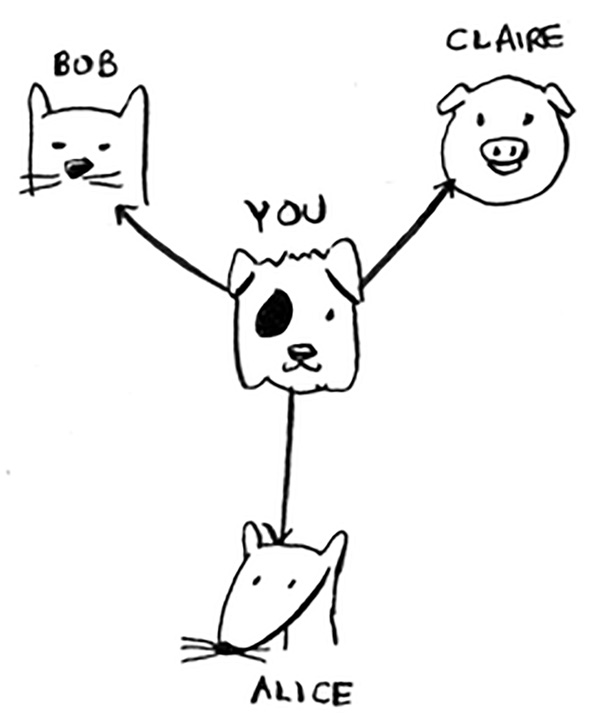

This search is pretty straightforward.
First, make a list of friends to search.

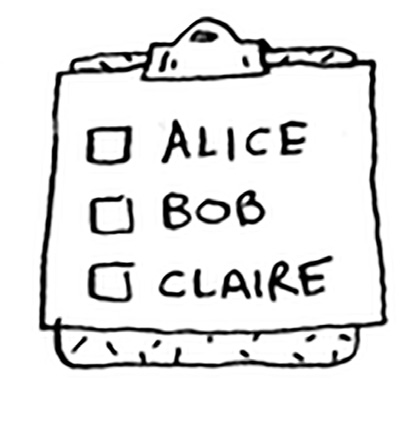

Now, go to each person in the list and check whether that person sells mangoes.

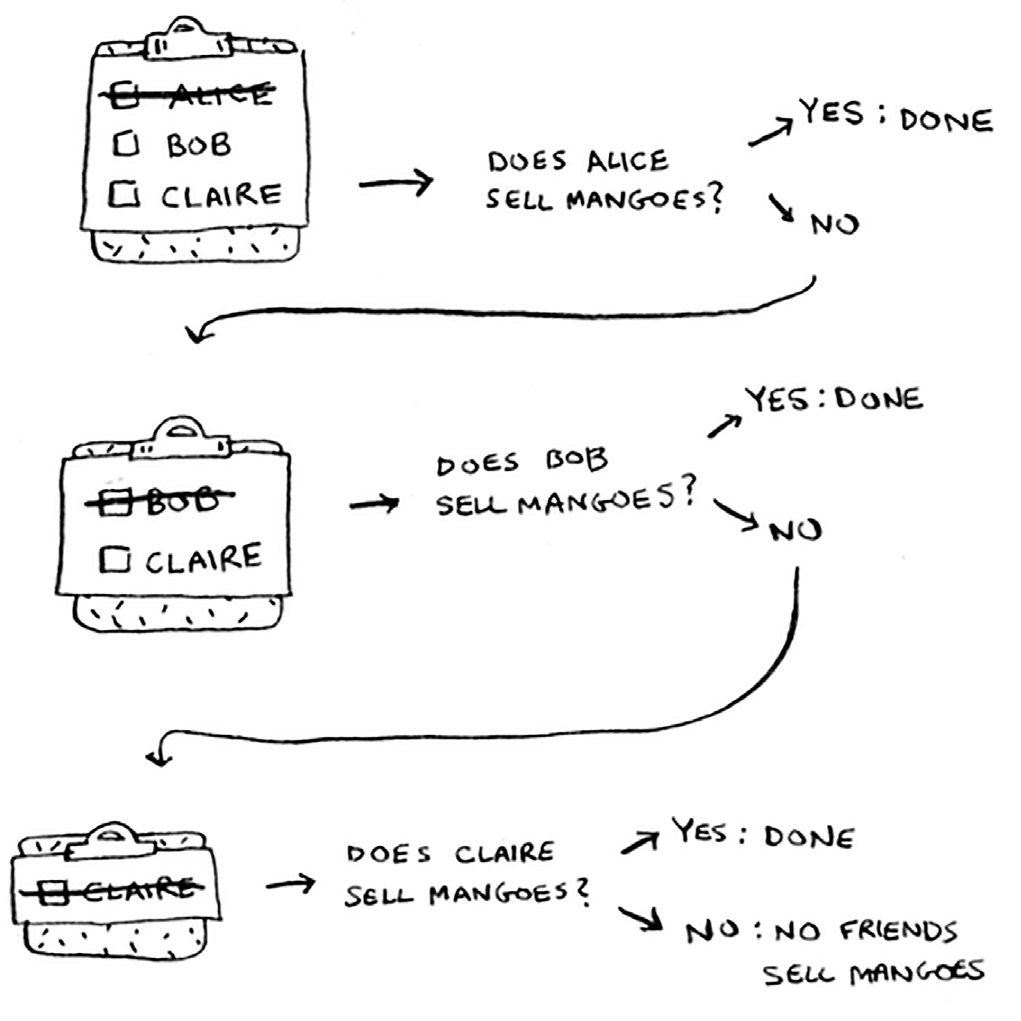v

Suppose none of your friends are mango sellers. Now you have to search through your friends’ friends.

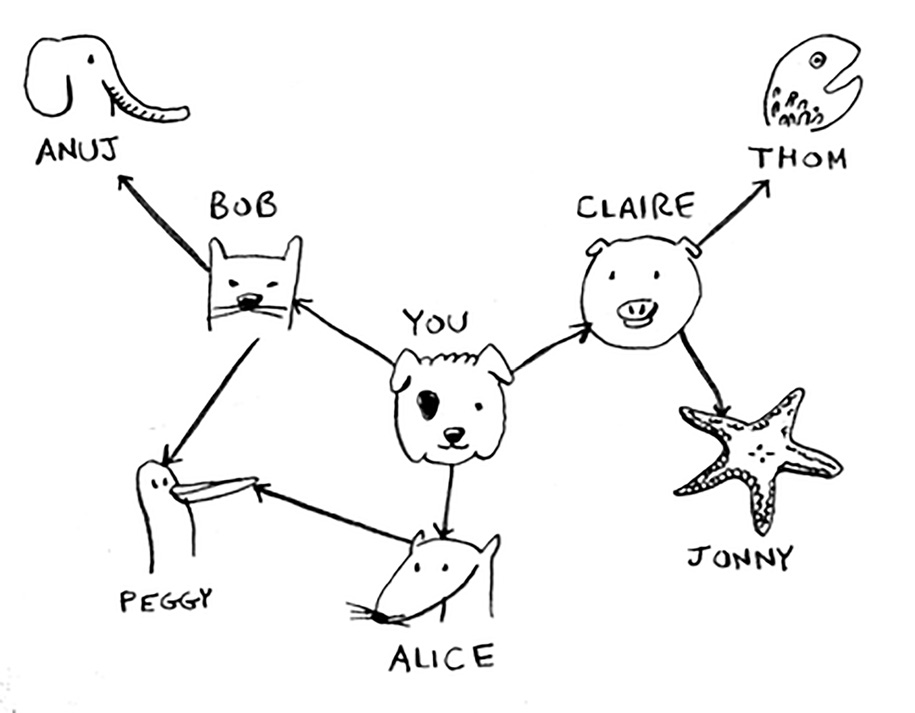

Each time you search for someone from the list, add all of their friends to the list.

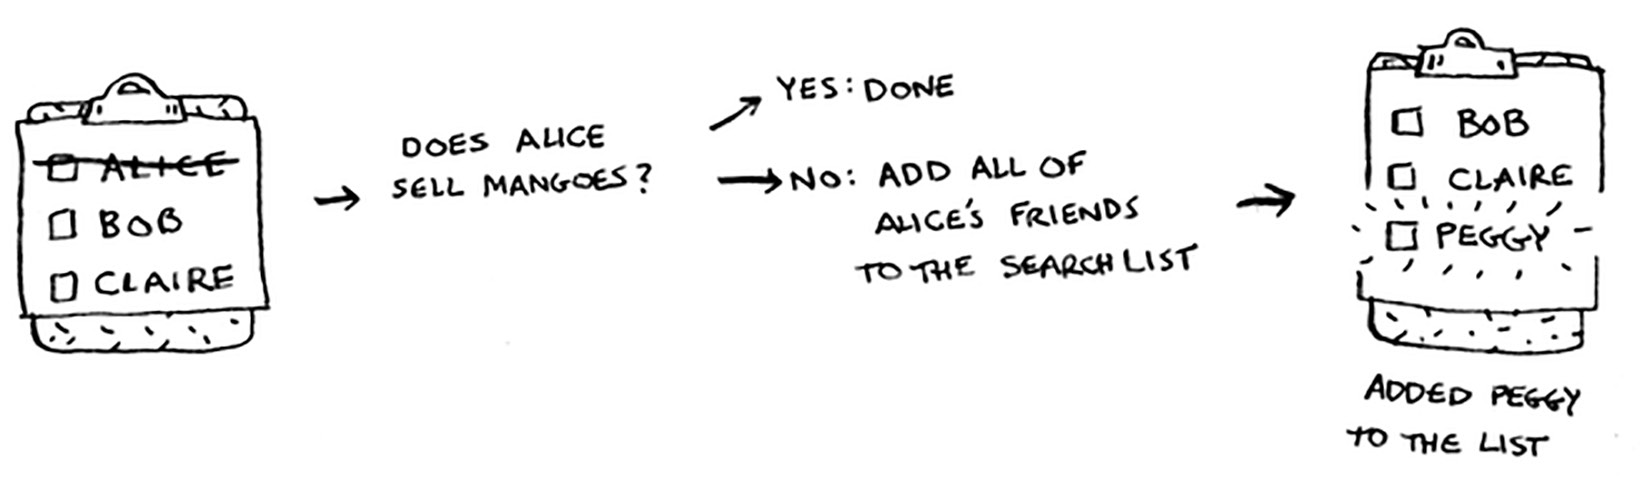

This way, you not only search your friends, but you search their friends, too. Remember, the goal is to find one mango seller in your network. So if Alice isn’t a mango seller, you add her friends to the list, too. That means you’ll eventually search her friends—and then their friends, and so on. With this algorithm, you’ll search your entire network until you come across a mango seller. This algorithm is breadth-first search.

### Finding the shortest path

As a recap, these are the two questions that breadth-first search can answer for you:
- Question type 1: Is there a path from node A to node B? (Is there a mango seller in your network?)
- Question type 2: What is the shortest path from node A to node B? (Who is the closest mango seller?)

You saw how to answer question 1; now let’s try to answer question 2. Can you find the closest mango seller? For example, your friends are first-degree connections, and their friends are second-degree connections.

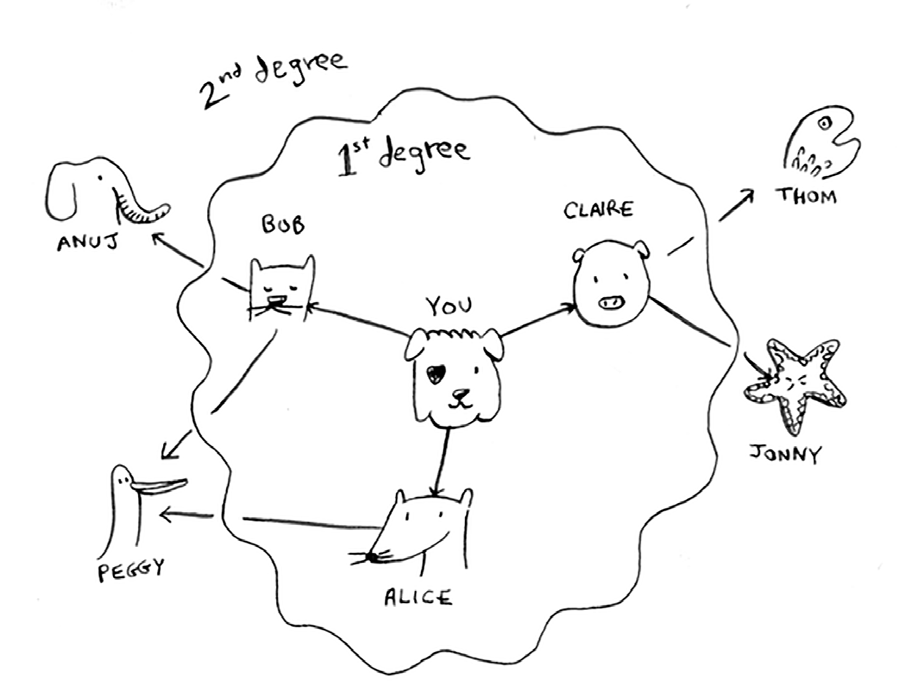

Another way to see this is, first-degree connections  are added to the search list before second- degree connections.

You just go down the list and check people to see whether each one is a mango seller. The first-degree connections will be searched before the seconddegree connections, so you’ll find the mango seller closest to you. Breadth-first search not only finds a path from A to B, it also finds the shortest path.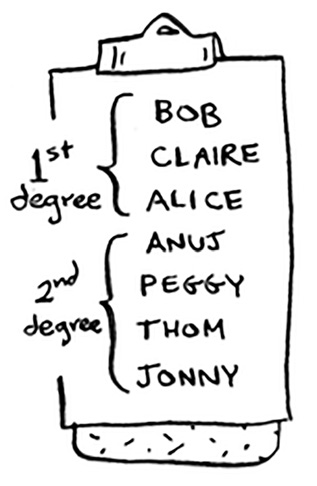

So you need to search people in the order that they’re added. There’s a data structure for this: it’s called a queue.

### Queues

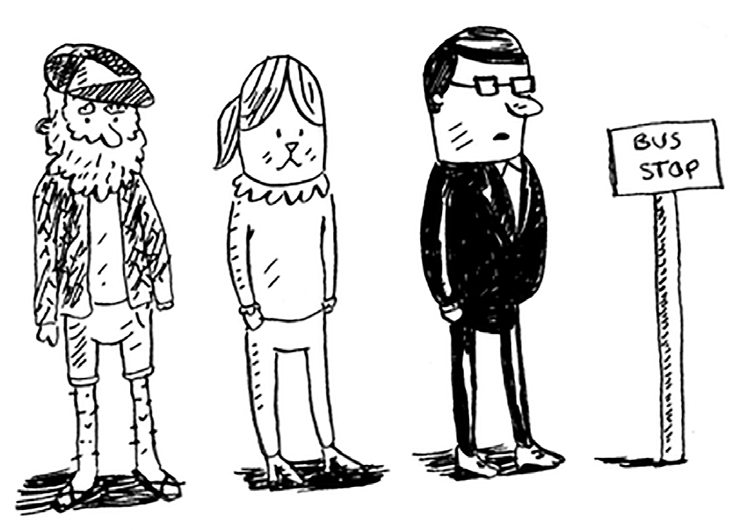

A queue works exactly like it does in real life. Suppose you and your friend are queueing up at the bus stop. If you’re before him in the queue, you get on the bus first. A queue works the same way. Queues are similar to stacks. You can’tccess random elements in the queue. Instead, there are two only operations, enqueue and dequeue.

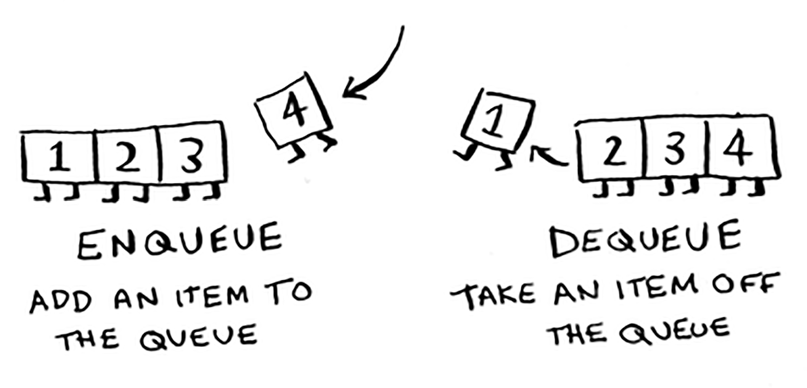

If you enqueue two items to the list, the first item you added will be dequeued before the second item. You can use this for your search list! People who are added to the list first will be dequeued and searched first.

The queue is called a FIFO data structure: First In, First Out. In contrast, a stack is a LIFO data structure: Last In, First Out.

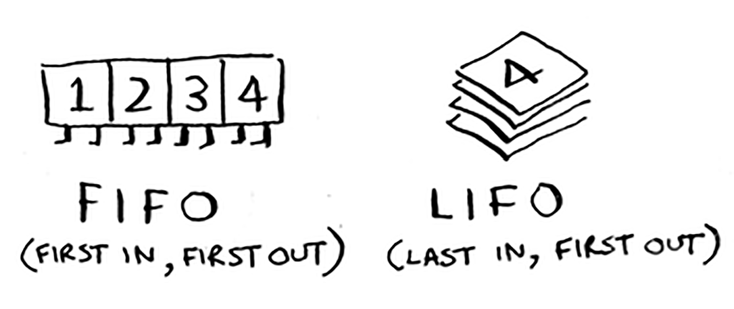

## Exercises Run the breadth-first search algorithm on each of these graphs to find the solution.

### 6.1 Find the length of the shortest path from start to finish. 

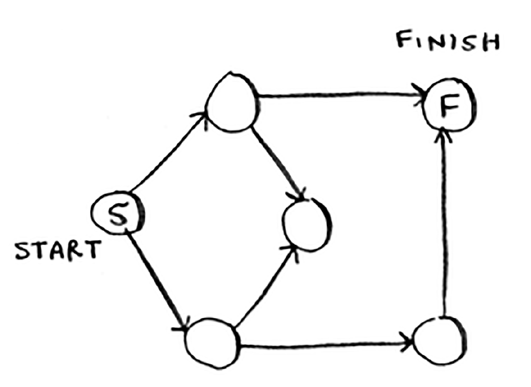

**Answer**
The shortest path has a length of 2.

### 6.2 Find the length of the shortest path from “cab” to “bat”.

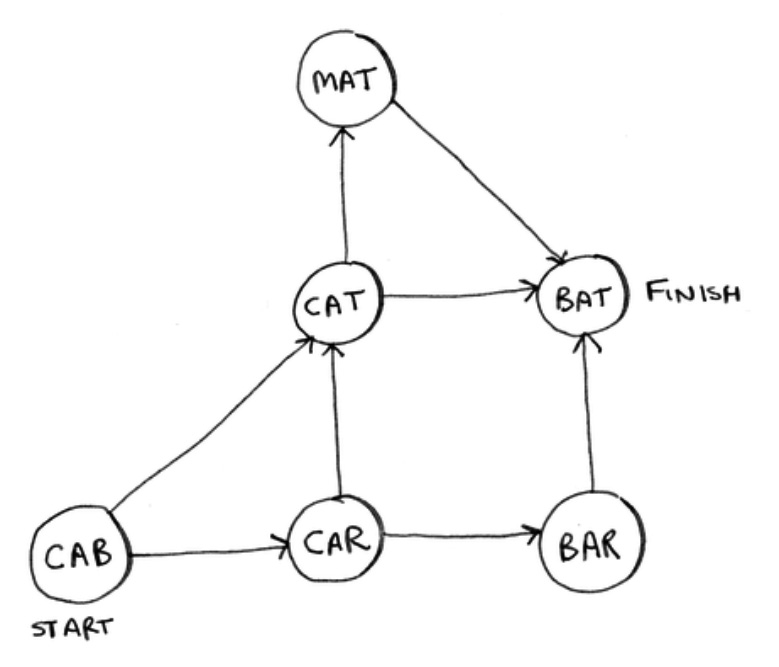

**Answer**
The shortest path has a length of 2.

## Implementing the graph

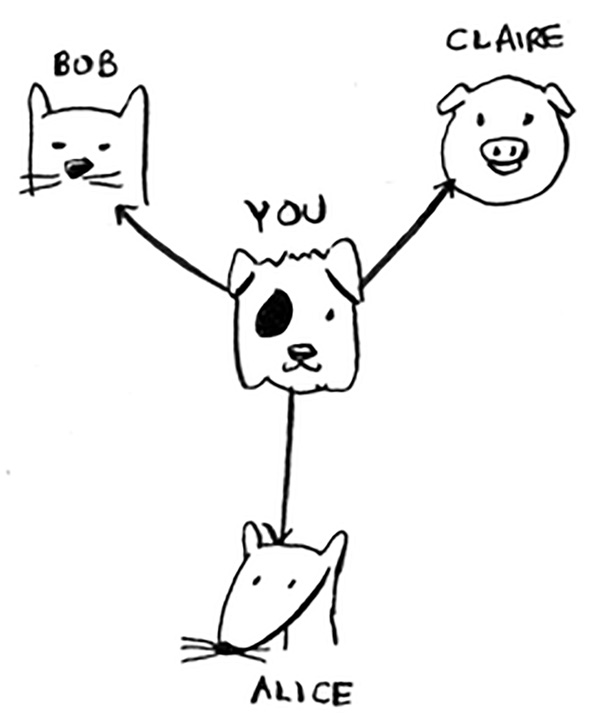

Remember, a hash table allows you to map a key to a value. In this case, you want to map a node to  all of its neighbors.

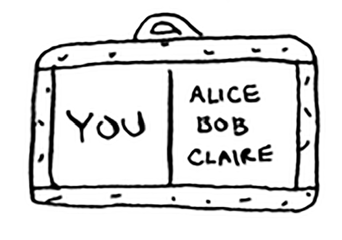

In python:

```python
graph = {}
graph["you"] = ["alice", "bob", "claire"]
```

Notice that “you” is mapped to an array. So graph\[“you”\] will give youan array of all the neighbors of “you”.

A graph is just a bunch of nodes and edges, so this is all you need to have a graph in Python. What about a bigger graph, like this one?

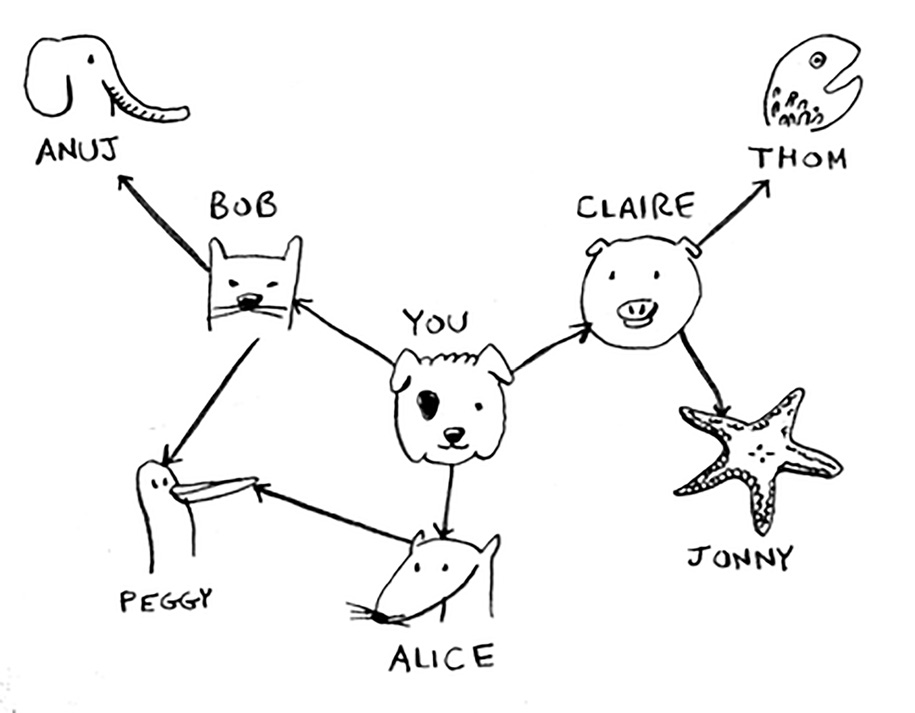

Here it is as Python code:

In [7]:
graph = {}
graph["you"] = ["alice", "bob", "claire"]
graph["bob"] = ["anuj", "peggy"]
graph["alice"] = ["peggy"]
graph["claire"] = ["thom", "jonny"]
graph["anuj"] = []
graph["peggy"] = []
graph["thom"] = []
graph["jonny"] = []

It doesn’t matter in what order you add the key/value pairs. Hash tables have no ordering, so it doesn’t matter what order you addkey/value pairs in.

Anuj, Peggy, Thom, and Jonny don’t have any neighbors. They have arrows pointing to them, but no arrows from them to someone else. This is called a directed graph—the relationship is only one way. So Anuj is Bob’s neighbor, but Bob isn’t Anuj’s neighbor. An undirected graph doesn’t have any  arrows, and both nodes are each other’s neighbors. For example, both of these graphs are equal.

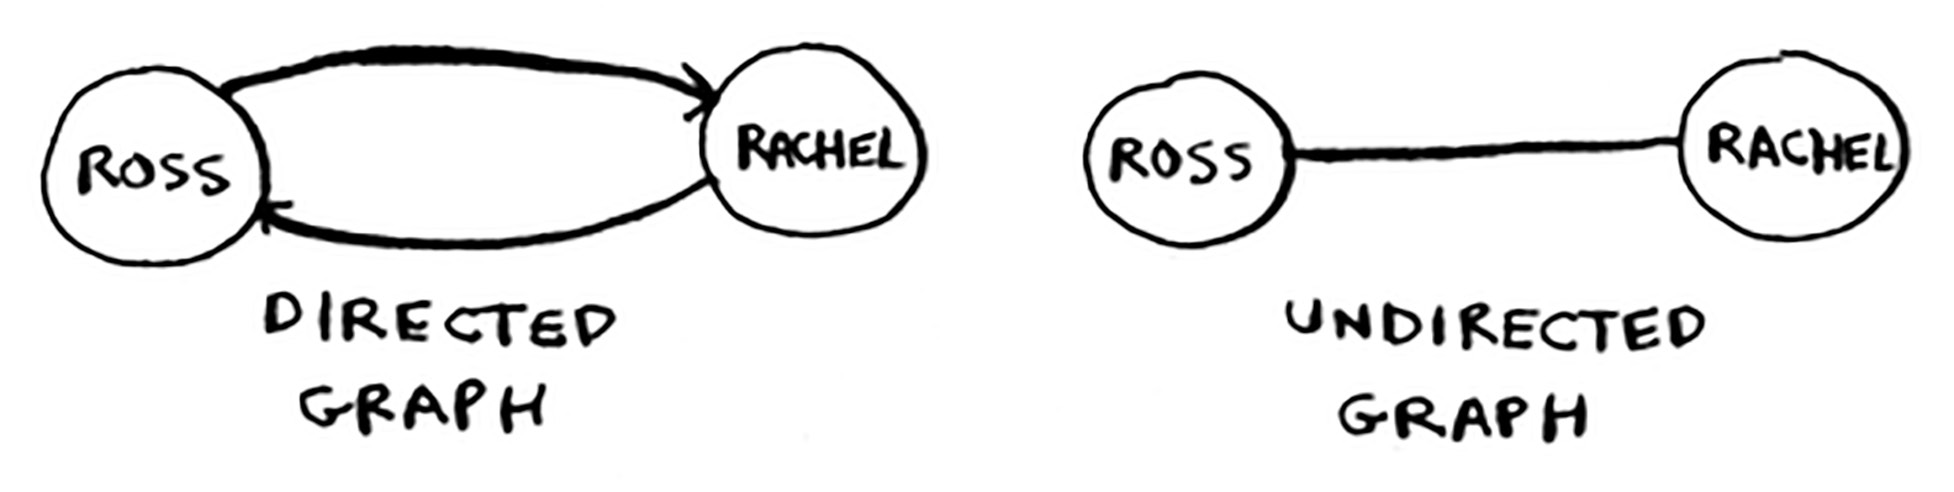

## Implementing the algorithm

To recap, here’s how the implementation will work.

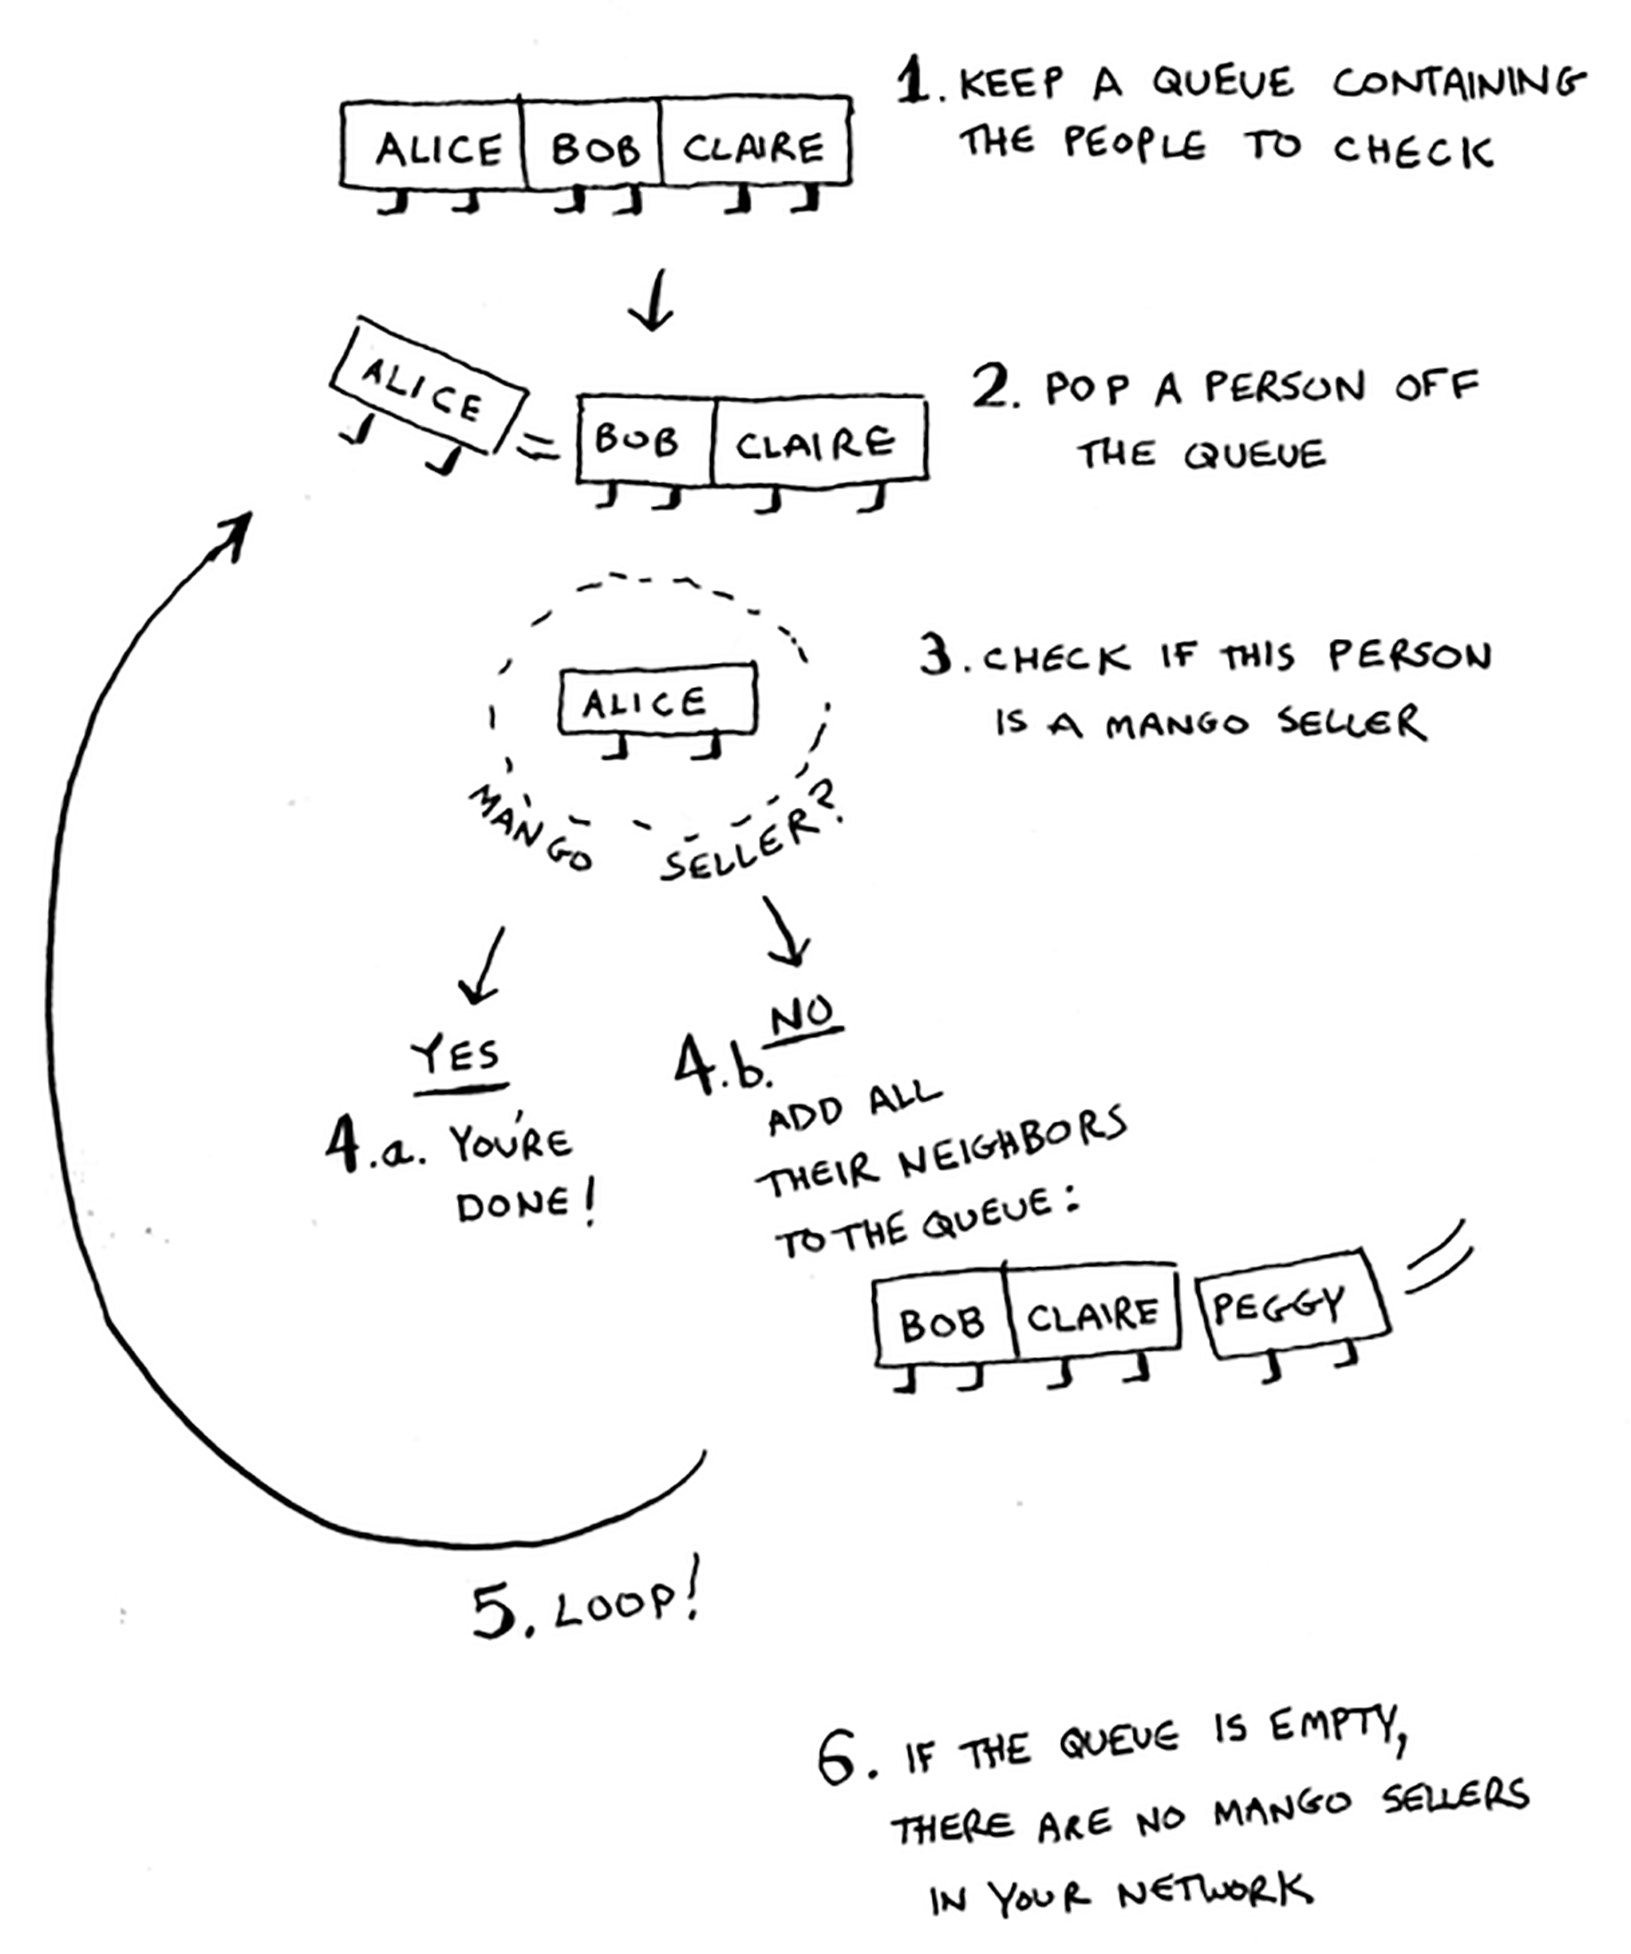

Make a queue to start. In Python, you use the double-ended queue (deque) function for this:

Remember, graph[“you”] will give you a list of all your neighbors, like [“alice”, “bob”, “claire”]. Those all get added to the search queue.

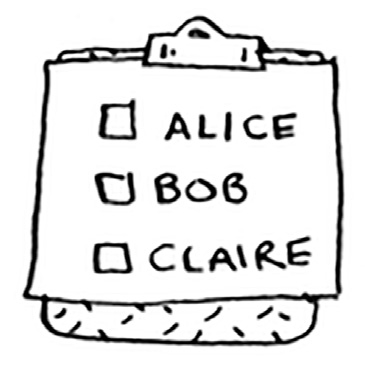

In [15]:
from collections import deque

def person_is_seller(name):
    """
    This function checks whether the person’s name ends with the letter m. 
    If it does, they’re a mango seller. Kind of a silly way to do it, but it’ll do 
    for this example. Now let’s see the breadth-first search in action.
    """
    return name[-1] == 'm'

def has_mango_seller(graph):
    search_queue = deque()                            # Creates a new queue
    search_queue += graph["you"]                      # Adds all of your neighbors to the search queue

    while search_queue:                               # While the queue isn't empty...
        person = search_queue.popleft()               # ...grabs the first person off the queue
        if person_is_seller(person):                  # Checks whether the person is a mango seller
            print(person + " is a mango seller!")     # Yes, they're a mango seller
            return True
        else:
            search_queue += graph[person]             # No, they aren't. Add all of this person's friends
                                                      ## to the search queue
    return False                                      # If you reached here, no one in the queue was a 
                                                      ## mango seller

In [17]:
# Test
has_mango_seller(graph)

thom is a mango seller!


True

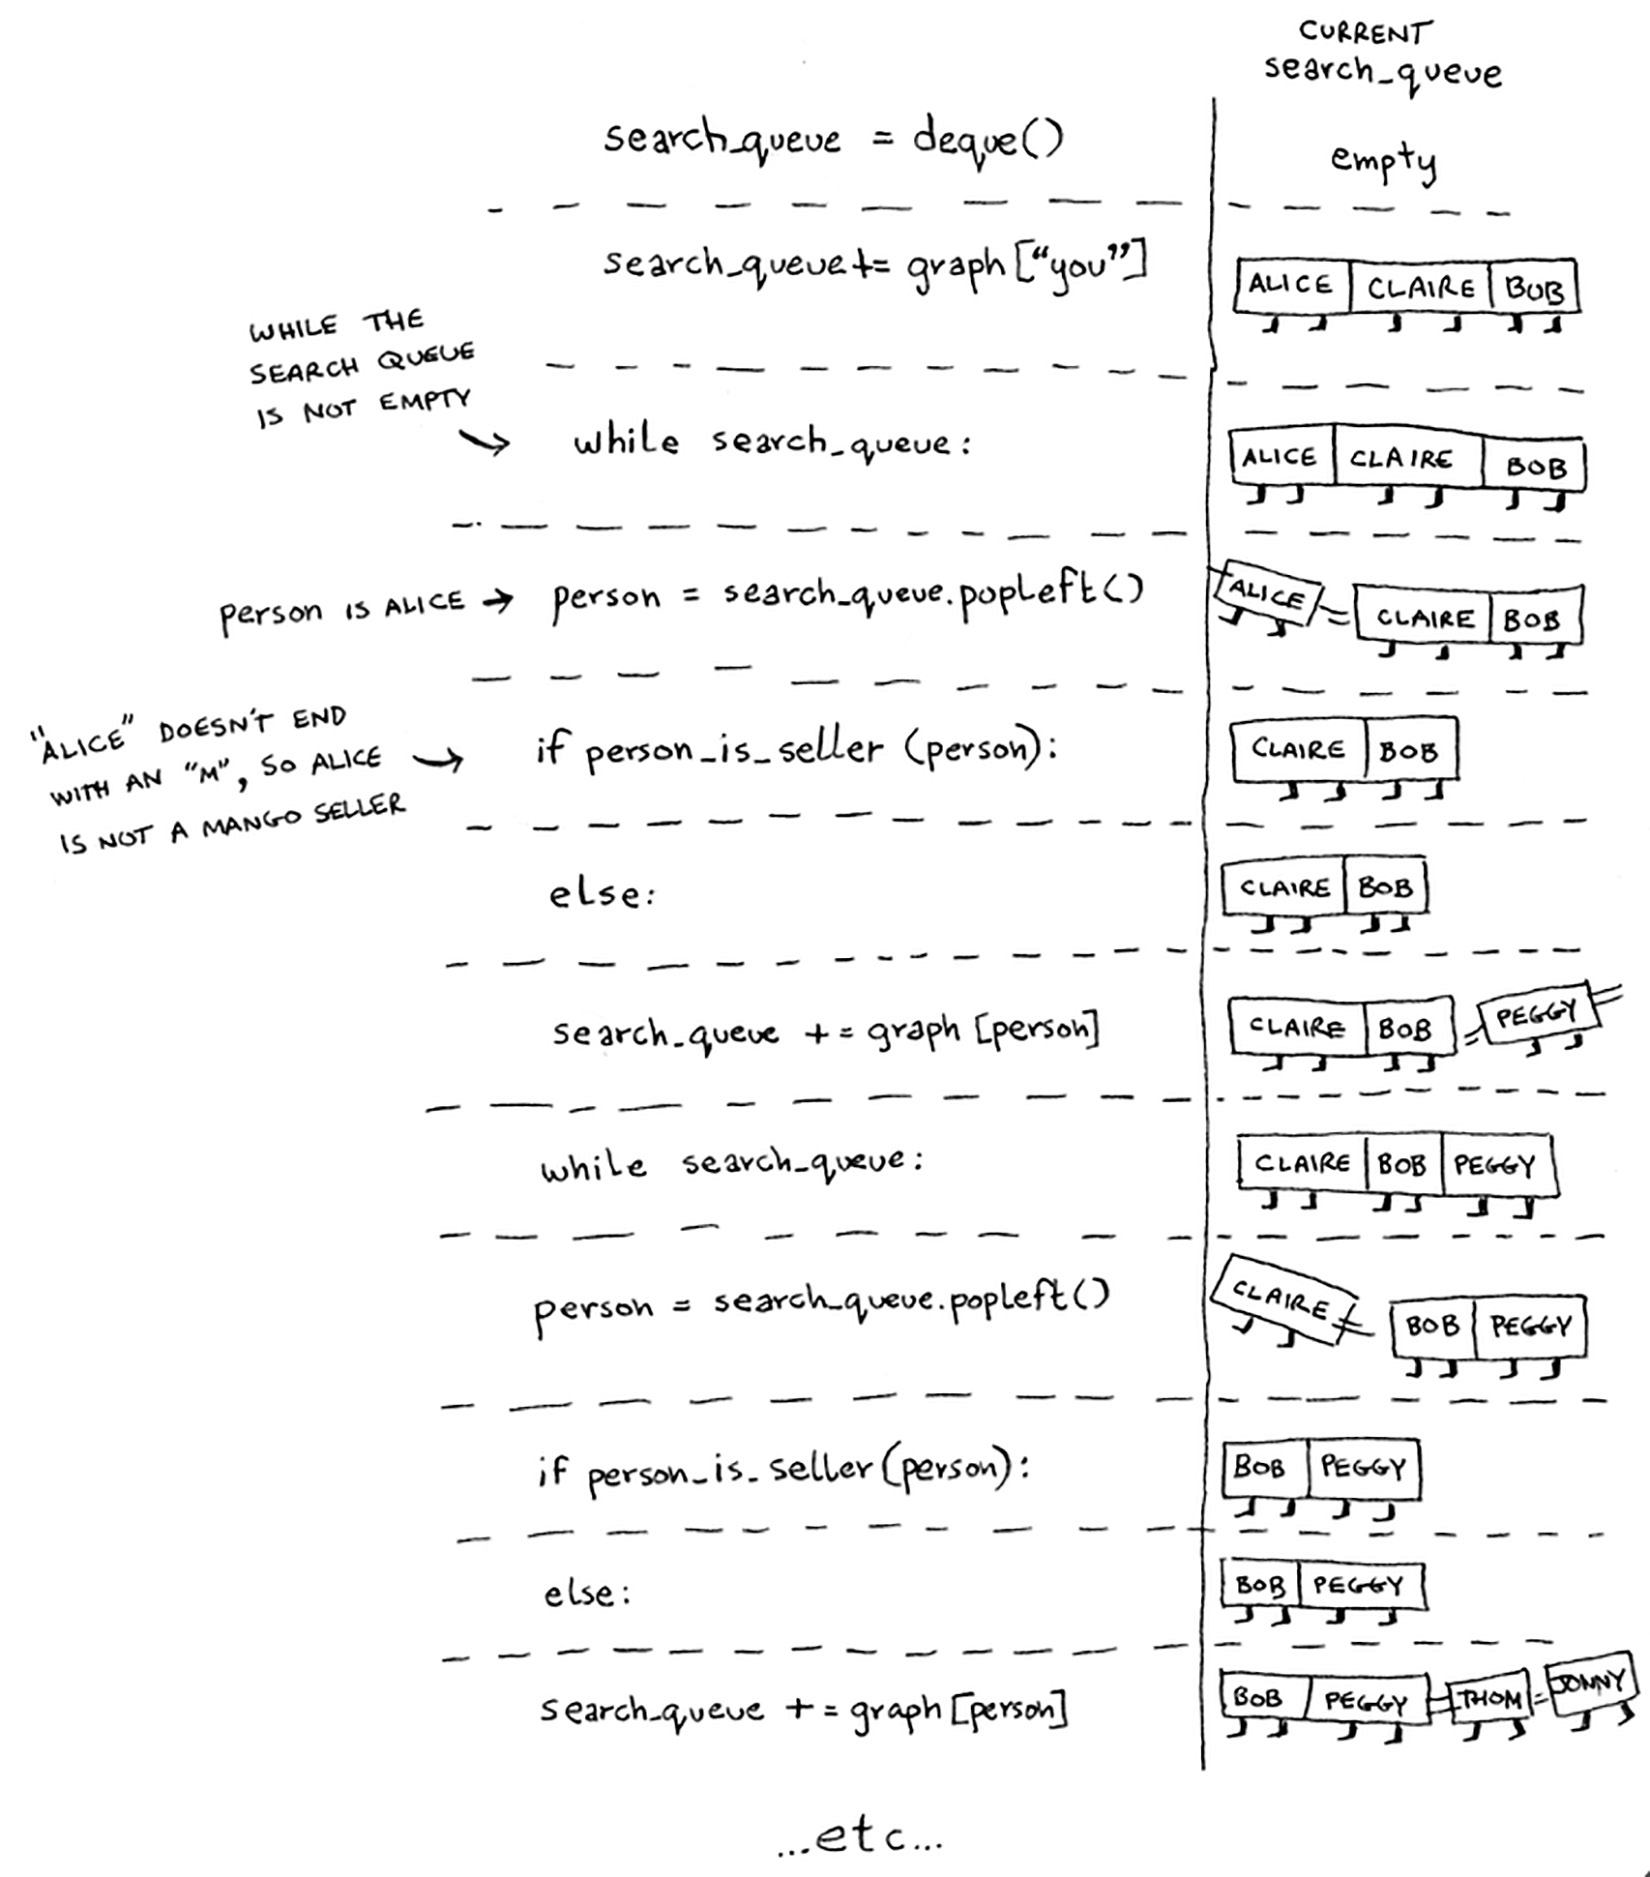

And so on. The algorithm will keep going until either
- A mango seller is found, or
- The queue becomes empty, in which case there is no mango seller.

Alice and Bob share a friend: Peggy. So Peggy will be added to the queue twice: once when you add Alice’s friends, and again when you add Bob’s friends. You’ll end up with two Peggys in the search queue.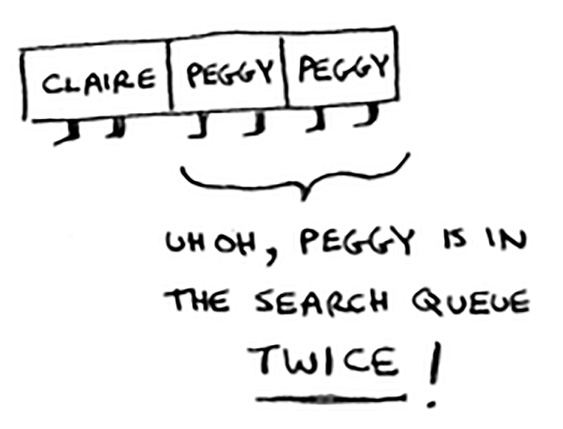

But you only need to check Peggy once to see whether she’s a mango seller. If you check her twice, you’re doing unnecessary, extra work. So once you search a person, you should mark that person as searched and not search them again.

If you don’t do this, you could also end up in an infinite loop. Suppose the mango seller graph looked like this.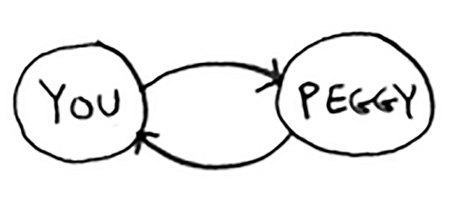

To start, the search queue contains all of your neighbors.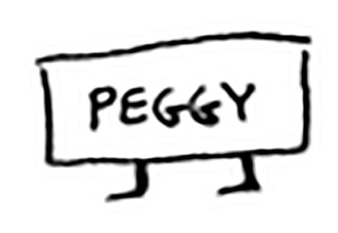

Now you check Peggy. She isn’t a mango seller, so you add all of her neighbors to the search queue.
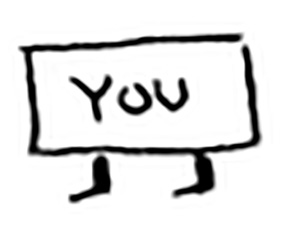

Next, you check yourself. You’re not a mango seller, so you add all of your neighbors to the search queue.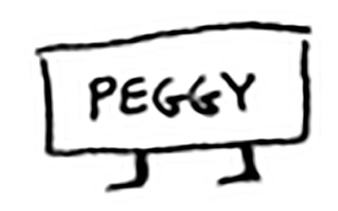

And so on. This will be an infinite loop, because the search queue will keep going from you to Peggy.
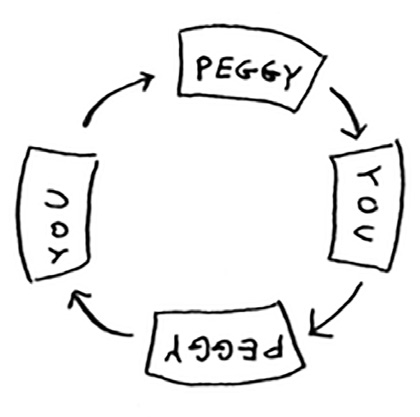

Before checking a person, it’s important to make sure they haven’t been checked already. To do that, you’ll keep a list of people you’ve already checked.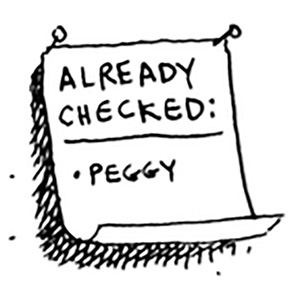

Here’s the final code for breadth-first search, taking that into account:

In [19]:
def search(name):
    search_queue = deque()
    search_queue += graph[name]
    searched = []                   # This array is how you keep track of which people you've searched before
    while search_queue:
        person = search_queue.popleft()
        if not person in searched:  # Only search this person if you haven't already searched them
            if person_is_seller(person):
                print(person + " is a mango seller!")
                print(True)
            else:
                search_queue += graph[person]
                searched.append(person)  # Mark this person as searched
    return False

# Test
search("you")       

thom is a mango seller!
True


False

### Running time

If you search your entire network for a mango seller, that means you’ll follow each edge (remember, an edge is the arrow or connection from one person to another). So the running time is at least O(number of edges).

You also keep a queue of every person to search. Adding one person to the queue takes constant time: O(1). Doing this for every person will take O(number of people) total. Breadth-first search takes O(number of people + number of edges), and it’s more commonly written as O(V+E) (V for number of vertices, E for number of edges).

## Exercise

Here’s a small graph of my morning routine.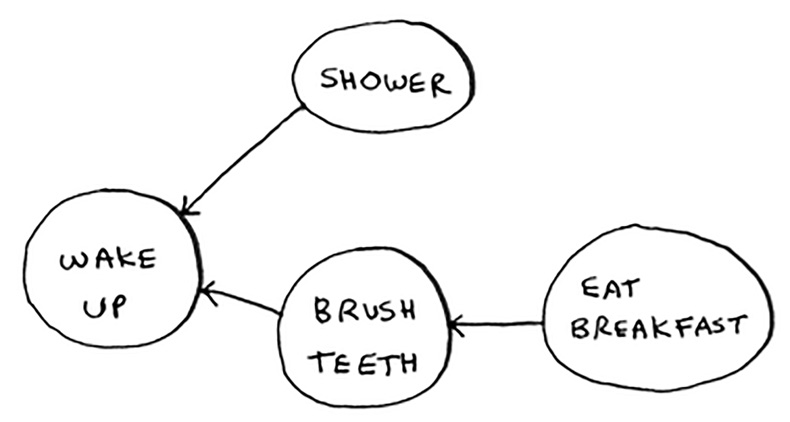

It tells you that I can’t eat breakfast until I’ve brushed my teeth. So “eat breakfast” depends on “brush teeth”.

On the other hand, showering doesn’t depend on brushing my teeth, because I can shower before I brush my teeth. From this graph, you can make a list of the order in which I need to do my morning routine:
1. Wake up.
2. Shower.
3. Brush teeth.
4. Eat breakfast.

Note that “shower” can be moved around, so this list is also valid:
1. Wake up.
2. Brush teeth.
3. Shower.
4. Eat breakfast.

### 6.3 For these three lists, mark whether each one is valid or invalid.
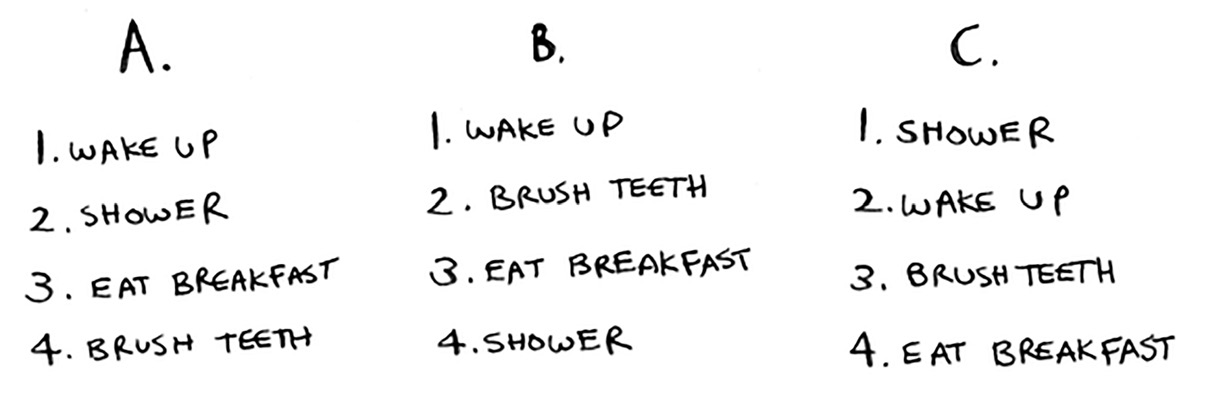

**Answer**
A. Invalid, B. Valid, C. Invalid

### 6.4 Here’s a larger graph. Make a valid list for this graph.
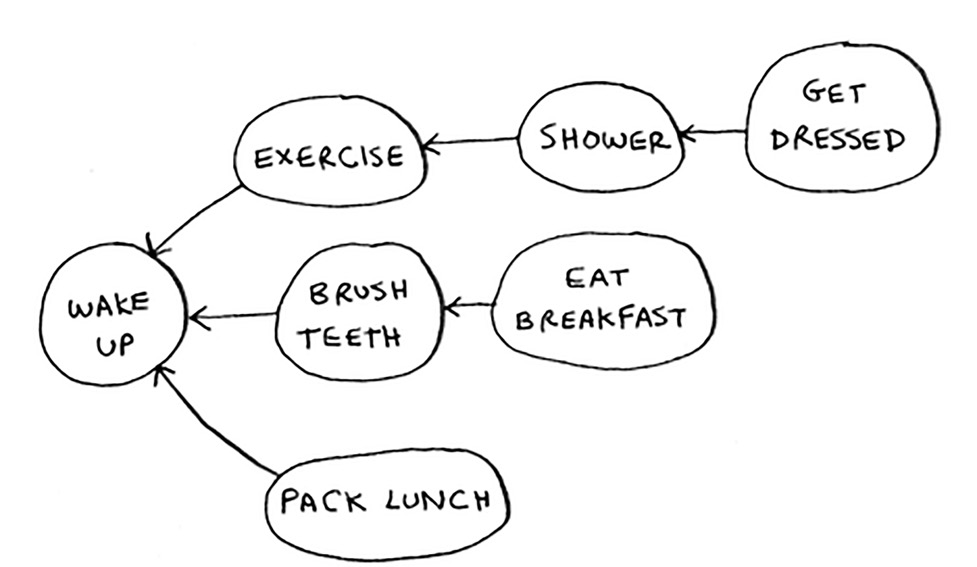

You could say that this list is sorted, in a way. If task A depends on task B, task A shows up later in the list. This is called a topological sort, and it’s a way to make an ordered list out of a graph. Suppose you’re planning a wedding and have a large graph full of tasks to do—and you’re not sure where to start. You could topologically sort the graph and get a list of tasks to do, in order.

Suppose you have a family tree.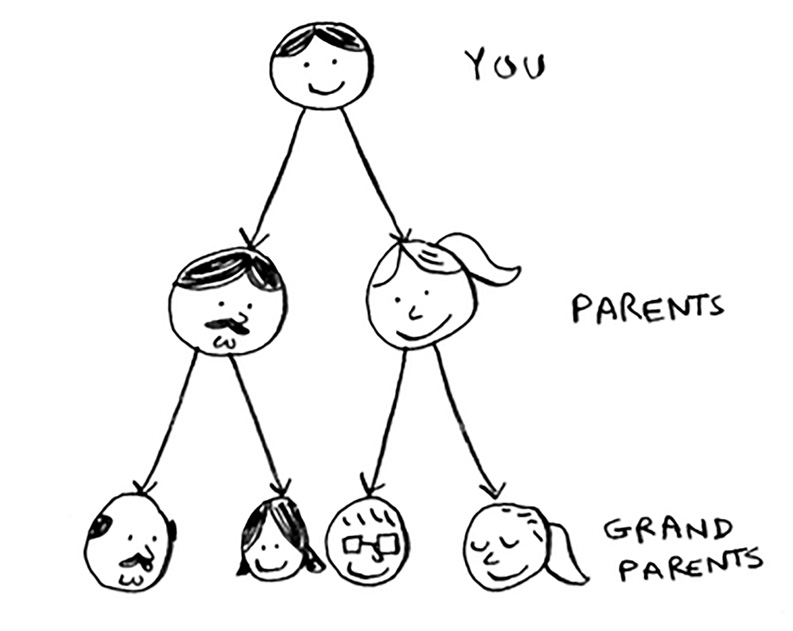

This is a graph, because you have nodes (the people) and edges.
The edges point to the nodes’ parents. But all the edges go down—it wouldn’t make sense for a family tree to have an edge pointing back up! That would be meaningless—your dad can’t be your grandfather’s dad!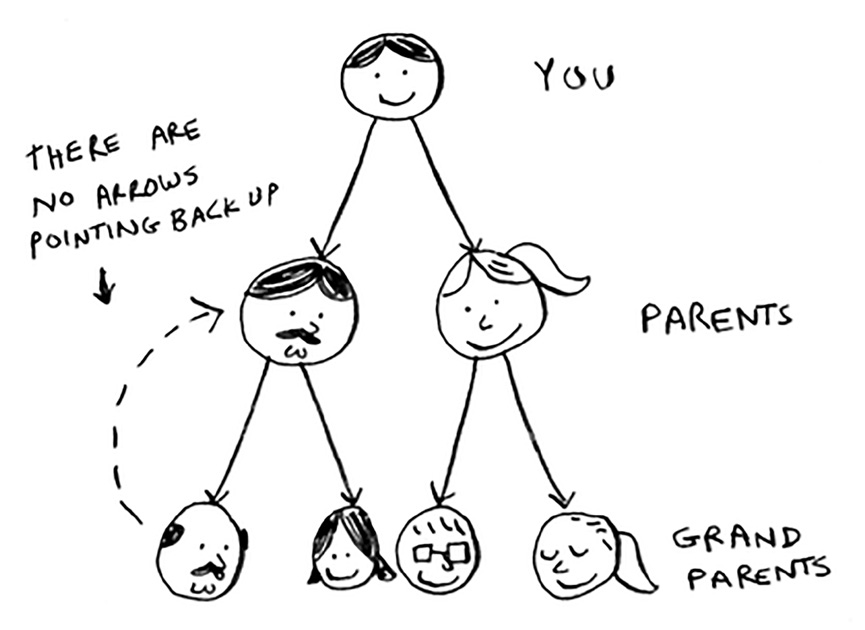

This is called a tree. A tree is a special type of graph, where no edges ever point back.


**Answer**
1. Wake up
2. Exercise
3. Brush Teeth
4. Shower
5. Eat Breakfast
6. Pack Lunch
7. Get Dressed

### 6.5 Which of the following graphs are also trees?
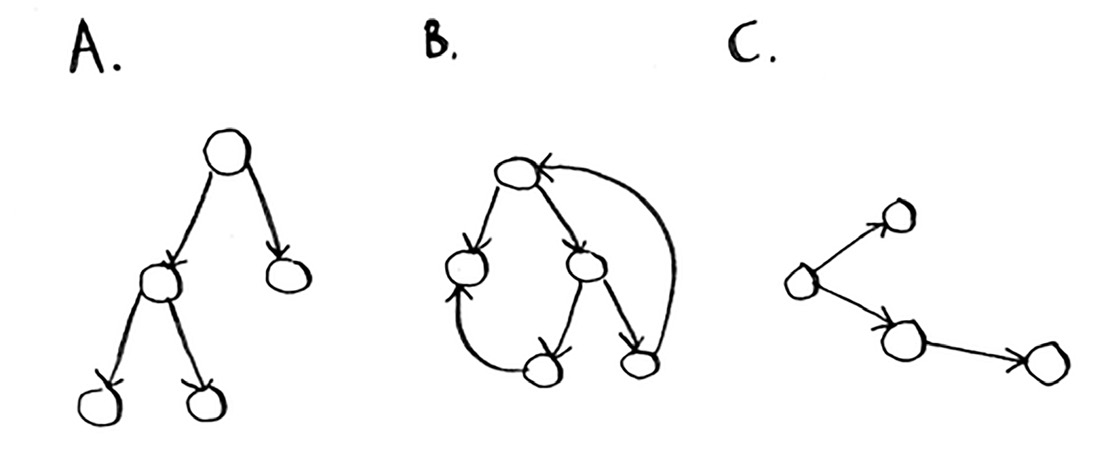

**Answer**
A. Tree, B. Not a Tree, C. Tree
The last example is just a sideways tree. Trees are a subset of graphs. So a tree is always a graph, but a graph may or may not be a tree.

## Recap

- Breadth-first search tells you if there’s a path from A to B.
- If there’s a path, breadth-first search will find the shortest path.
- If you have a problem like “find the shortest X,” try modeling your problem as a graph, and use breadth-first search to solve.
- A directed graph has arrows, and the relationship follows the direction of the arrow (rama -> adit means “rama owes adit money”).
- Undirected graphs don’t have arrows, and the relationship goes both ways (ross - rachel means “ross dated rachel and rachel dated ross”).
- Queues are FIFO (First In, First Out).
- Stacks are LIFO (Last In, First Out).
- You need to check people in the order they were added to the search list, so the search list needs to be a queue. Otherwise, you won’t get the shortest path.
- Once you check someone, make sure you don’t check them again. Otherwise, you might end up in an infinite loop.